In [96]:
from scipy import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [90]:
# Web parsing libraries
from bs4 import BeautifulSoup
import urllib2
import mechanize                    # Browser subterfuge
import re # regex

## Constructing the head of a sunflower with Vogel's floret

The idea is to build points that are successively subtended by an angle of 137.5 degrees from the preceeding one:

$$ \theta_k = k \phi, $$
$$ r_k = \sqrt{k}, $$

where $\delta = 137.5$ degrees. To explain why this angle appears, Vogel described a simple growth program. Mark the side branches on a stem as points on a circle. The program prescribes that each new branch is subtended at the same angle $\delta$  from the previous one, and that each new branch fits into the largest existing gap between older branches.

In [74]:
def fibonacci(n):
    phi = (1+sqrt(5))/2.
    output = [1,1]
    x_out = []
    y_out = []
    r_out = []

    for i in range(n):
        output.append(output[-1]+output[-2])
        r_out.append(sqrt(i))
        theta = i*(2*pi)/(phi*phi)    
        x_out.append(sqrt(i)*cos(theta))
        y_out.append(sqrt(i)*sin(theta))
    
    return output, x_out, y_out, r_out

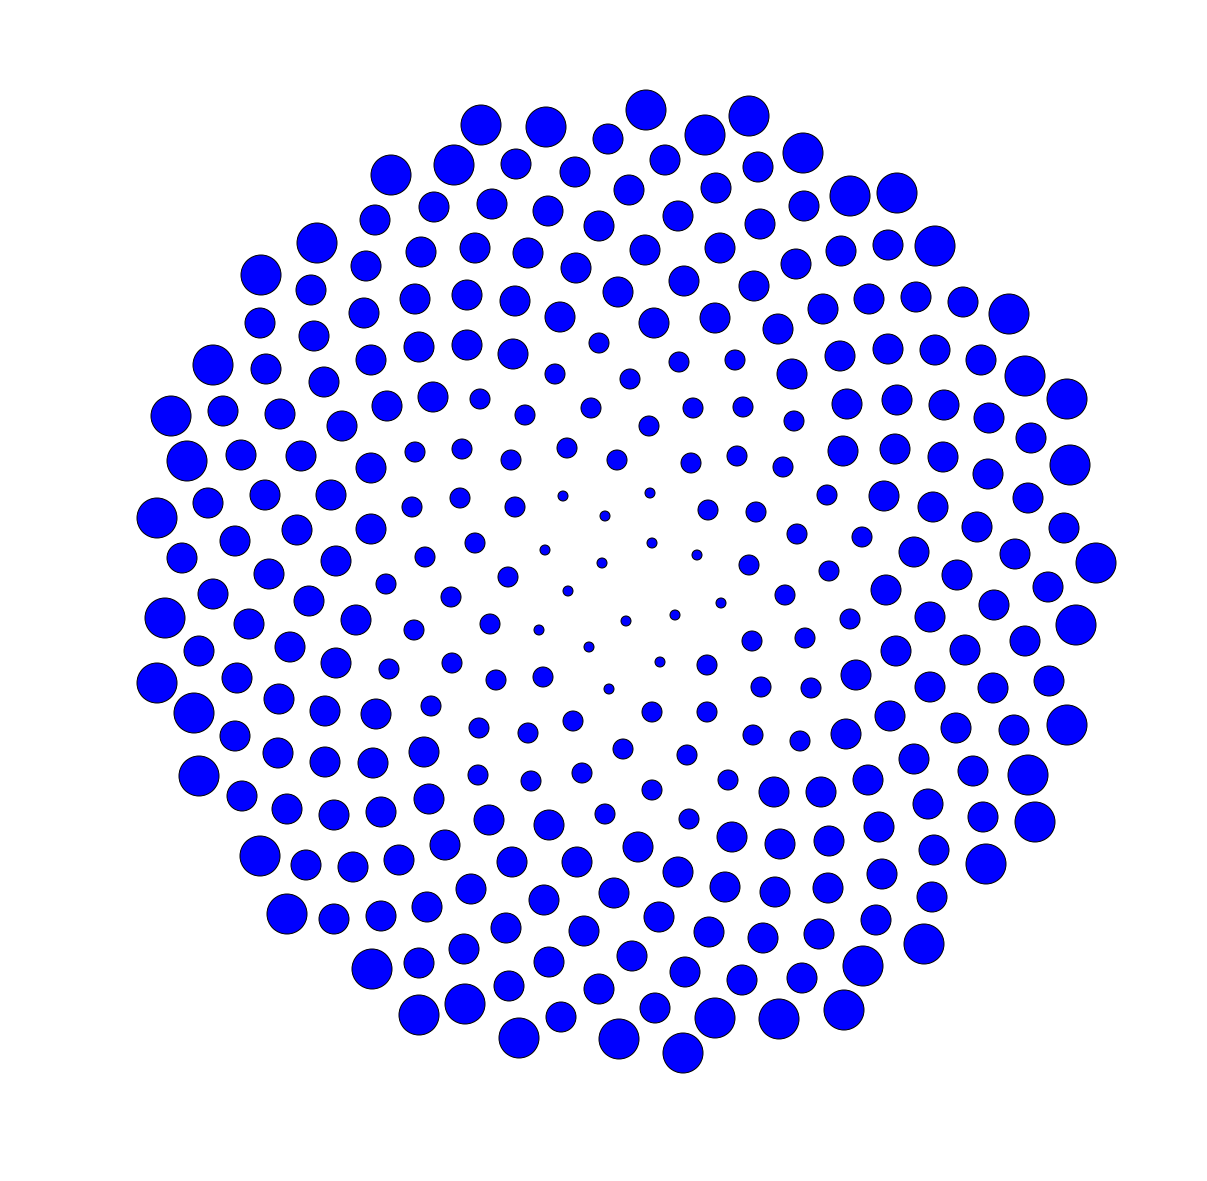

In [145]:
fib = x = y = r = []
fib, x, y, r = fibonacci(300) #959
plt.figure(figsize=(10,10))
plt.axis('off')

for i in range(len(x)):
    if i < 2000:
        # print(x[i],y[i])
        plt.plot(x[i], y[i], 'bo', markersize=5*int(sqrt(r[i])))
    else:
        plt.plot(x[i], y[i], 'bd', markersize=11)     
        
plt.savefig('sunflower.eps')

## Colouring Vogel's floret

This is a function that downloads various palettes from Colourlovers.

In [91]:
'''
Reads an online copy of a colourlovers.com web page
and parses the colours in RGB.
'''
def get_colours_online(url):
    browser = mechanize.Browser()
    browser.set_handle_robots(False)                 # Browser is not a robot
    browser.addheaders = [('User-agent', 'Firefox')] # Says that it's Firefox
    data = browser.open(url).read() 
    soup = BeautifulSoup(data, 'html.parser') # html parser
    
    all_hdr = soup.find_all('h4')    # all colours embedded in <h4>
    idx = [8+i*6 for i in range(10)] # probably less than 10 colours
    output_idx = []
    for i in range(len(all_hdr)):
        if idx[i] < len(all_hdr):
            output_idx.append(idx[i])
        else:
            break
            
    tag_re = re.compile(r'(<!--.*?-->|<[^>]*>)')# tag regex
    colours_raw = [all_hdr[op] for op in output_idx]
    output_colours = [tag_re.sub('', str(colours_raw[i])) for i in range(len(colours_raw))]
    output_tuple = [eval(output_colours[i]) for i in range(len(output_colours))]
    return output_tuple

'''
Make a custom colormap in Matplotlib
'''
def make_cmap(colors, position=None, bit=False):

    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

In [149]:
my_palette = get_colours_online('http://www.colourlovers.com/palette/4226304/*_i_k_a_r_i_H')
my_cmap = make_cmap(my_palette, bit=True)
colors = np.r_[np.linspace(0.1, 1, 300), np.linspace(0.1, 1, 300)] 
mymap = plt.get_cmap(my_cmap)
my_colors = mymap(colors)

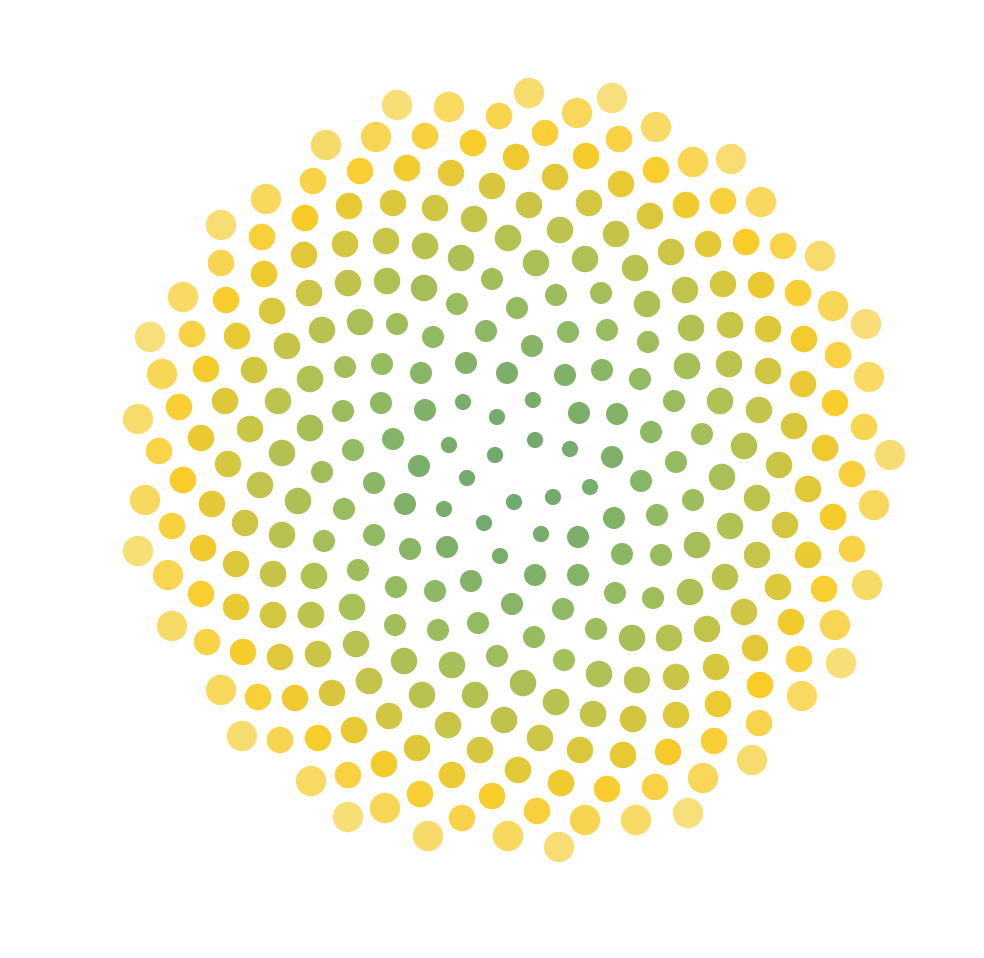

In [151]:
plt.figure(figsize=(8,8))
plt.axis('off')
for i in range(len(x)):
    plt.scatter(x[i], y[i], color=my_colors[i], s=50*int(sqrt(r[i])))
plt.savefig('floret.eps')